# King County House Project

The objective of this project is to find a multivariate linear regression to predict the sale price of houses as accurately as possible.

The data we will use will be the following:

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_houses= pd.read_csv("https://raw.githubusercontent.com/learn-co-curriculum/dsc-mod-2-project-v2-1/master/kc_house_data.csv")

In [3]:
print(data_houses.shape)
data_houses.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<br> Following the instructions of the project, we will remove the following rows.<br> 

In [4]:
data_houses = data_houses.drop(["date","view","sqft_above","sqft_basement","yr_renovated",
                                "zipcode","lat","long","sqft_living15","sqft_lot15"], axis =1)

#This code will drop the columns that are not relevant for the study.



In [5]:
print(data_houses.shape)
data_houses.head()

(21597, 11)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


## Data types

In [6]:
data_houses.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

## solving null values 'WATERFRONT'


In [7]:
data_houses.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

<br> Before deciding what to do with the null values, we must see how the non-null look like in the waterfront column. 

In [8]:
data_houses.waterfront.value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

<br> Because the vast majority are 0, we will replace the null values with the value 0.

In [9]:
data_houses.waterfront.replace(np.nan, 0, inplace=True)

In [10]:
data_houses.waterfront.value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Now we have no more null values in our data set and we can start fitting our models.

## Data visualisations

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
7700000.0


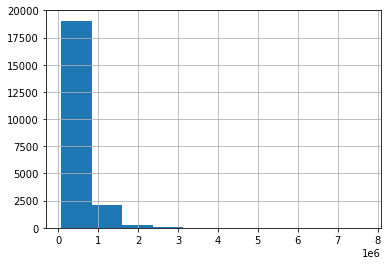

In [11]:
print(data_houses.price.describe())
data_houses.price.hist()
print(data_houses.price.max())

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


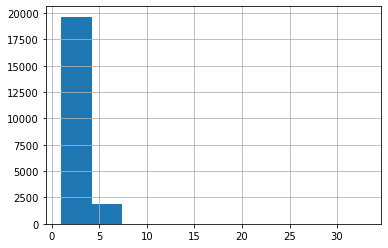

In [12]:
print(data_houses.bedrooms.describe())
data_houses.bedrooms.hist()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


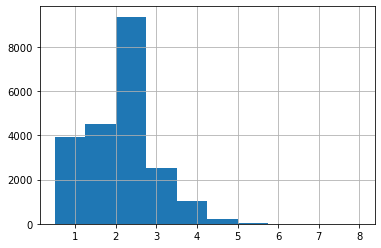

In [13]:
print(data_houses.bathrooms.describe())
data_houses.bathrooms.hist()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


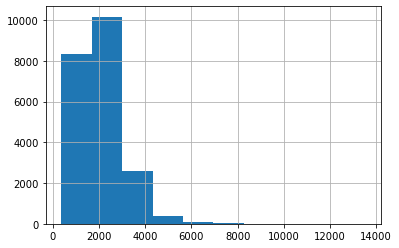

In [14]:
print(data_houses.sqft_living.describe())
data_houses.sqft_living.hist()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


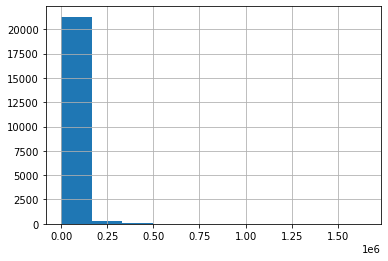

In [15]:
print(data_houses.sqft_lot.describe())
data_houses.sqft_lot.hist()


count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


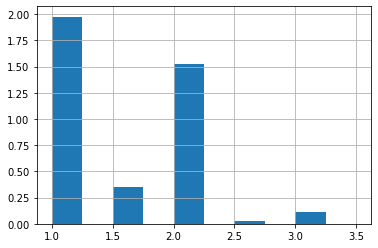

In [16]:
print(data_houses.floors.describe())
data_houses.floors.hist(density=1)

count    21597.000000
mean         0.006760
std          0.081944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64


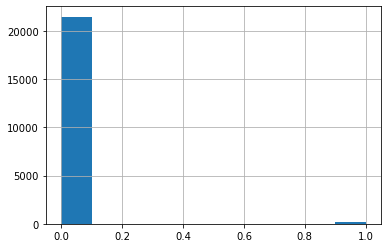

In [17]:
print(data_houses.waterfront.describe())
data_houses.waterfront.hist()

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64


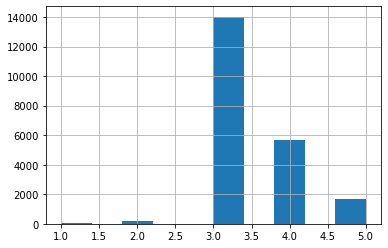

In [18]:
print(data_houses.condition.describe())
data_houses.condition.hist()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64


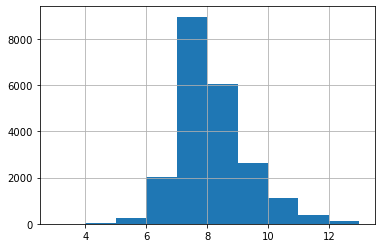

In [19]:
print(data_houses.grade.describe())
data_houses.grade.hist()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


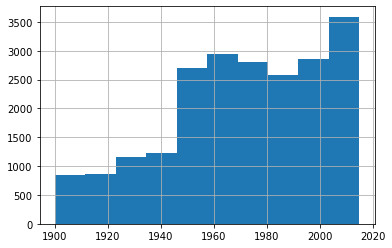

In [20]:
print(data_houses.yr_built.describe())
data_houses.yr_built.hist()

## outliers


### Price

In [21]:
ol_price = data_houses[data_houses.price > 1000000]

In [22]:
ol_price.shape

(1458, 11)

With a price of 1000000, there are too many houses, therefore we must set the outlier threshold higher. I will raise it to 5000000 to see if there are many price outliers. 

In [23]:
ol_price = data_houses[data_houses.price > 5000000]
ol_price

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1162,1247600105,5110000.0,5,5.25,8010,45517,2.0,1.0,3,12,1999
1313,7558700030,5300000.0,6,6.00,7390,24829,2.0,1.0,4,12,1991
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,0.0,3,12,2009
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,1.0,3,11,1940
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0.0,3,13,2001
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,0.0,4,13,1910
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,0.0,3,13,2001


By looking at the houses characteristicss, it might seem like the prices are not outliers, since they have large living spaces and number of bedrooms and bathrooms.

### Bedrooms

In [24]:
ol_bedroom = data_houses[data_houses.bedrooms > 10]

In [25]:
ol_bedroom

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
8748,1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,3,7,1918
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1947


It does not make much sense that a house with 33 bedrooms only has 1.75 bathrooms and such a limited living space, therefore I will remove this variable. 

### Sqft_living

In [26]:
ol_sqft_living = data_houses[data_houses.sqft_living > 10000]

In [27]:
ol_sqft_living

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3910,9808700762,7060000.0,5,4.5,10040,37325,2.0,1.0,3,11,1940
7245,6762700020,7700000.0,6,8.0,12050,27600,2.5,0.0,4,13,1910
12764,1225069038,2280000.0,7,8.0,13540,307752,3.0,0.0,3,12,1999


Although the values are high, it seems like the high values obtained, are not outliers, since there the prices and the other characteristics imply that the houses are big.

### Sqft_lot

In [28]:
ol_sqft_lot = data_houses[data_houses.sqft_lot > 1000000]

In [29]:
ol_sqft_lot

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1717,1020069017,700000.0,4,1.00,1300,1651359,1.0,0.0,4,6,1920
7640,2623069031,542500.0,5,3.25,3010,1074218,1.5,0.0,5,8,1931
7762,2323089009,855000.0,4,3.50,4030,1024068,2.0,0.0,3,10,2006
17305,3326079016,190000.0,2,1.00,710,1164794,1.0,0.0,2,5,1915


The last column seems like and outlier, the space around the house dos not match the other characteristics, thus that row will also be droped.

## Droping columns

In [30]:
data_houses.drop(index= [17305, 15856], inplace = True)

## Set - up

Before we start we must import the necessary libraries for the study.

In [200]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression

In [201]:
import statsmodels.formula.api as smf


## First model.

The first step is setting the columns that will be used for the model. The **Y** is the dependant variable that we are going to try to predict. The **X** are the explanatory variables. In this case we will select all the columns available in the dataset. This will be the model that we will try to beat with other models. 

In [202]:
y = pd.DataFrame(data_houses['price'])

X = pd.DataFrame(data_houses[['bedrooms', 'bathrooms', 'sqft_living',
                              'sqft_lot', 'floors', 'waterfront', 'condition',
                             'grade' , 'yr_built']])

Here we first split the data in two, to keep some data free from the model fitting so we can later on use it to test validate our model. <br> <br>
This is used to keep this data to be free from bias from the model and test its validity.<br><br>
This data that is free from bias is the **X_test** data and **y_test** data.


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=2000, random_state=42)

Here we split the data that is used to train the model in two. <br><br>
**X_train_v**: This data is used to train the model.<br><br>
**X_val**: This data is used to validate the model.

In [204]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=2000, random_state=123)

Linear regression will be the approach we will use to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables 

In [205]:
lin_reg = LinearRegression()

Here we train the model with the **X_train_v** data to later on see validate it with the **X_val** data.

In [206]:
lin_reg.fit(X_train_v, y_train_v);

In [207]:
lin_reg.score(X_train_v, y_train_v)

0.6446939363663138

In [208]:
lin_reg.score(X_val, y_val)

0.6504880877621173

The result look quite good, it seems that the training we did for the model fit well for the X_val. <br> <br> 
We will now do the same with different explanatory variables to try to find a better model, if this does not happen we will keep this model.

In [209]:
X_train["prices"] = y_train
X_train.head(3)

<ipython-input-209-089f99193ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["prices"] = y_train


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,prices
19750,4,3.5,3040,4006,2.0,0.0,3,8,2013,815000.0
1493,4,2.5,2460,4862,2.0,0.0,3,8,2004,495000.0
8523,1,1.0,900,6380,1.0,0.0,3,6,1947,350000.0


In [211]:
formula = 'prices ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + condition + grade + yr_built' 
    # t = aB +intercep
model = smf.ols(formula, data=X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3959.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:47:20   Log-Likelihood:            -2.6890e+05
No. Observations:               19595   AIC:                         5.378e+05
Df Residuals:                   19585   BIC:                         5.379e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.662e+06   1.38e+05     48.419      0.000    6.39e+06    6.93e+06
bedrooms    -4.821e+04   2264.751    -21.289      0.000   -5.27e+04   -4.38e+04
bathrooms    4.927e+04   3667.283     13.434      0.000    4.21e+04    5.65e+04
sqft_living   183.9170      3.526     52.160      0.000     177.006     190.828
sqft_lot       -0.2781      0.040     -6.927      0.000      -0.357      -0.199
floors        2.05e+04   3660.213      5.601      0.000    1.33e+04    2.77e+04
waterfront   7.524e+05   1.92e+04     39.180      0.000    7.15e+05     7.9e+05
condition    1.916e+04   2635.393      7.269      0.000     1.4e+04    2.43e+04
grade        1.296e+05   2284.769     56.703      0.000    1.25e+05    1.34e+05
yr_built    -3822.7561     70.721    -54.054      0.000   -3961.374   -3684.138
==============================================================================
Omnibus:                    14530.702   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           947418.912
Skew:                           2.977   Prob(JB):                         0.00
Kurtosis:                      36.540   Cond. No.                     3.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Second model


For this model, I have kept the variables that I believe will be the best explanatory variables that determine the prices of houses. I have kept bedrooms and sqft_living because they are related with the size of the house, which oftentimes is the best variable that explains the price. I have also kept condition because if a house is big but in bad conditions, the house is worthless. I will carry out the same steps as in the first model but with just these variables.

In [159]:
X1 = pd.DataFrame(data_houses[['bedrooms', 'sqft_living',
                                'condition']])
y1 = pd.DataFrame(data_houses['price'])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=2000, random_state=42)

In [154]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=2000, random_state=123)

Training and Validating with Train / Validation / Test

In [155]:
lin_reg = LinearRegression()

In [156]:
lin_reg.fit(X_train_v, y_train_v);

In [157]:
lin_reg.score(X_train_v, y_train_v)

0.5167393141072052

In [158]:
lin_reg.score(X_val, y_val)

0.5135635572767165

The model was less accurate than expected, and more importantly, less accurate than the first model, therefore we will not use this model for the test data.

In [177]:
X_train["prices"] = y_train
X_train.head(3)

<ipython-input-177-089f99193ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["prices"] = y_train


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,prices
19750,4,3.5,3040,4006,2.0,0.0,3,8,2013,815000.0
1493,4,2.5,2460,4862,2.0,0.0,3,8,2004,495000.0
8523,1,1.0,900,6380,1.0,0.0,3,6,1947,350000.0


In [175]:
formula = 'prices ~ bedrooms  + sqft_living + condition'  
    # t = aB +intercep
model = smf.ols(formula, data=X_train_v)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6270.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:27:49   Log-Likelihood:            -2.4424e+05
No. Observations:               17595   AIC:                         4.885e+05
Df Residuals:                   17591   BIC:                         4.885e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.287e+04   1.25e+04     -5.807      0.000   -9.75e+04   -4.83e+04
bedrooms    -6.857e+04   2684.587    -25.542      0.000   -7.38e+04   -6.33e+04
sqft_living   326.6209      2.651    123.220      0.000     321.425     331.817
condition    4.835e+04   2999.559     16.119      0.000    4.25e+04    5.42e+04
==============================================================================
Omnibus:                    11995.206   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           445299.214
Skew:                           2.790   Prob(JB):                         0.00
Kurtosis:                      27.005   Cond. No.                     1.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Third Model


Here we will evaluate all certain variables that seem to be more predictive based on previous betas for the explanatory variables. 

In [214]:
X2 = pd.DataFrame(data_houses[['sqft_living',
                              'sqft_lot', 'floors', 'waterfront',
                             'yr_built']])

y2 = pd.DataFrame(data_houses['price'])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=2000, random_state=42)

In [216]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=2000, random_state=123)

Training and Validating with Train / Validation / Test

In [217]:
lin_reg = LinearRegression()

In [218]:
lin_reg.fit(X_train_v, y_train_v);

In [219]:
lin_reg.score(X_train_v, y_train_v)

0.5669259834437321

In [220]:
lin_reg.score(X_val, y_val)

0.5570382450265766

This model was relatively better than the second one, but still less predictive than the first model, therefore we will still keep the first model.

In [221]:
X_train["prices"] = y_train
X_train.head(3)

<ipython-input-221-089f99193ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["prices"] = y_train


,sqft_living,sqft_lot,floors,waterfront,yr_built,prices
19750,3040,4006,2.0,0.0,2013,815000.0
1493,2460,4862,2.0,0.0,2004,495000.0
8523,900,6380,1.0,0.0,1947,350000.0


In [222]:
formula = 'prices ~ sqft_living + sqft_lot + floors + waterfront + yr_built' 
    # t = aB +intercep
model = smf.ols(formula, data=X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     5110.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:49:46   Log-Likelihood:            -2.7087e+05
No. Observations:               19595   AIC:                         5.418e+05
Df Residuals:                   19589   BIC:                         5.418e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      5.3e+06   1.34e+05     39.650      0.000    5.04e+06    5.56e+06
sqft_living   290.1331      2.110    137.472      0.000     285.996     294.270
sqft_lot       -0.2588      0.044     -5.860      0.000      -0.345      -0.172
floors       7.215e+04   3820.691     18.885      0.000    6.47e+04    7.96e+04
waterfront   8.128e+05   2.12e+04     38.411      0.000    7.71e+05    8.54e+05
yr_built    -2776.4970     69.387    -40.014      0.000   -2912.502   -2640.492
==============================================================================
Omnibus:                    12308.868   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441107.068
Skew:                           2.476   Prob(JB):                         0.00
Kurtosis:                      25.710   Cond. No.                     3.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Training the model

Here we will train the model with the whole train data, including validation data, to make it more accurate and later on test it with the set of data that has remained untouched.

In [86]:
X = pd.DataFrame(data_houses[['bedrooms', 'bathrooms', 'sqft_living',
                              'sqft_lot', 'floors', 'waterfront', 'condition',
                             'grade' , 'yr_built']])
y = pd.DataFrame(data_houses['price'])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=2000, random_state=42)

In [88]:
lin_reg = LinearRegression()

In [89]:
lin_reg.fit(X_train, y_train);

In [90]:
lin_reg.score(X_train, y_train)

0.6452989522494108

In [235]:
lin_reg.score(X_test, y_test)

0.6529705381437041

the score measures the proportion of the variance for a dependent variable that's explained by the explanatory variables. <br> <br>
In this case, the variables explain **65.29% of the variance of the price.**